<a href="https://www.kaggle.com/code/leonanvasconcelos/image-tiling-with-parallelization?scriptVersionId=218654189" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Code below has been based on version auto generated by CHAT GPT 4.0 with prompt:

> Give me a python code that runs in Kaggle Notebook and:
> 1. Split image in m x n parts, called subimage. Don’t save in disk, but in memory. 
> 2. Display all subimages together, in order, with a blank space between them. 
> 3. Processing must be optimized and make use of as much parallelization as possible, for example, using map while splitting image.



In [1]:
# Leonan Vasconcelos - 30-oct-2023
## Image Tile with Paralelization

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from multiprocessing import Pool
import time, random
from time import sleep

# Input parameters

In [2]:
# Parameters
image_path = '/kaggle/input/cctv-train/Juguetes_A_2022-10-29 (24).jpg'
m = 6  # number of rows
n = 5  # number of columns

# Definitions of Methods 

Crop a given image in M x N parts, returning not only the image but also useful information in future, like position.

In [3]:
# Crop image function
def crop_image(args):
    image, image_path, i, j, m, n, width, height = args
    left = (width/n) * j
    upper = (height/m) * i
    right = left + (width/n)
    lower = upper + (height/m)
    index = i*n + j
    
    sleep(random.uniform(1, 2))
    print(f"Processing image part number {index} position ({i}x{j})")
    
    return (image.crop((left, upper, right, lower)), image_path, index, i, j, m, n)

First create a list of all crops, for execute all togheter in parallel by using pool and map.

In [4]:
# Split image function with parallel processing
def split_image(image_path, m, n):
    image = Image.open(image_path)
    width, height = image.size
    params = [(image, image_path, i, j, m, n, width, height) for i in range(m) for j in range(n)]
    
    with Pool() as pool:
        subimages = pool.map(crop_image, params)
    
    return subimages

Display cropped images with positional info.

In [5]:
# Display function
def display_subimages(subimages, hspace=0.05, wspace=0.05):
    for i_image in subimages:
        image, image_path, index, i, j, m, n = i_image
        
        
        if index == 0:
            fig, axs = plt.subplots(m, n)
            axs = axs.ravel()
            fig.suptitle(f"{image_path}: {m}x{n}", fontsize=10)
        
        axs[index].set_title(f"[{index}] ({i}, {j})", fontsize=6)
        axs[index].imshow(np.asarray(image))
        axs[index].axis('off')
    
    plt.subplots_adjust(wspace=wspace, hspace=hspace)
    plt.show()

# Testing

Show the original image.

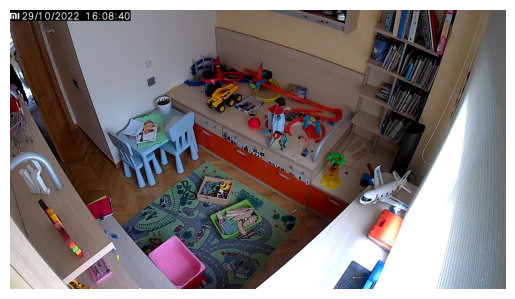

In [6]:
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.show()

Tile image in grid of M x N.

Make sure the output of this cell contains indexes out of order.
It means that split has been processed in parallel.

In [7]:
# Splitting the image and displaying the subimages
subimages = split_image(image_path, m, n)

Processing image part number 4 position (0x4)
Processing image part number 0 position (0x0)
Processing image part number 2 position (0x2)
Processing image part number 6 position (1x1)
Processing image part number 1 position (0x1)
Processing image part number 5 position (1x0)
Processing image part number 3 position (0x3)
Processing image part number 7 position (1x2)
Processing image part number 10 position (2x0)
Processing image part number 8 position (1x3)
Processing image part number 12 position (2x2)
Processing image part number 14 position (2x4)
Processing image part number 11 position (2x1)
Processing image part number 13 position (2x3)
Processing image part number 9 position (1x4)
Processing image part number 16 position (3x1)
Processing image part number 18 position (3x3)
Processing image part number 15 position (3x0)
Processing image part number 17 position (3x2)
Processing image part number 20 position (4x0)
Processing image part number 19 position (3x4)
Processing image part n

# Visual validation

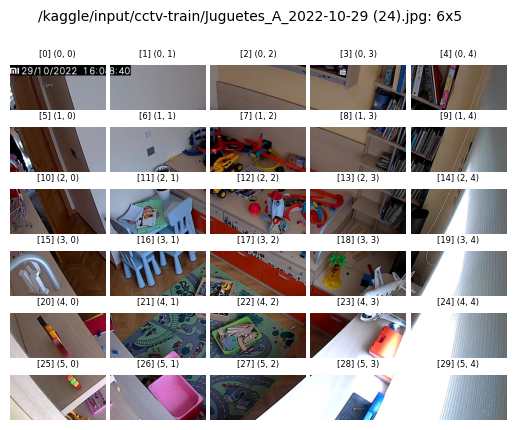

In [8]:
# Display all subimages together
display_subimages(subimages)